#  **Aircraft Purchase Risk Analysis**



## **Overview**
> The aim of this project is to analyze which aircraft are the lowest risk for a company to start as a new business endeavor using actionable insights derived from In-depth data analysis.



## **Business Problem**

To determine the safest aircraft with the lowest risk for a company to purchase when starting a new business endeavor. This will be decision will be guided by actionable insights from analysis




## **Data Understanding**

The dataset contains aviation accident data, with 31 columns detailing various aspects of each incident.

It includes information on:

- Aircraft details: Make, model, number of engines, engine type, amateur-built.

- Accident Details: Date, location (city/state/country), phase of flight, weather conditions, and accident severity.

- Operational Factors: Purpose of flight , regulatory information (FAR description), and air carrier details.

- Injury & Damage Information: Number of fatalities, serious injuries, minor injuries, and uninjured passengers.


> To gain these insights begin by:
1. Importing required libraries
2. Loading the dataset
3. Displaying an overview





In [147]:
#import the pandas and numpy libraries and give them aliases
import pandas as pd
import numpy as np

# import libraries for visualization for later on
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#load the dataset and display the first 5 rows
df = pd.read_csv('AviationData.csv', encoding= 'latin-1')
pd.set_option('display.max_columns', None) #displays all columns

#create a copy of the dataframe to preserve the original
df_AviationData = df.copy()

#preview the dataframe
df_AviationData.head()

<ipython-input-148-fc9b934311cf>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding= 'latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### **Display summary and summary statistics of the data**
- This helps get an overview of the data

> using the .describe() and the .info()

In [149]:
# display a summary statistics including all columns(objects)
df_AviationData.describe(include='object')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17074,2924
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [150]:
#display the summary statistics of numerical columns
df_AviationData.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [151]:
# display the dataframe summary
df_AviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## **Data Preparation**

### **Data cleaning**

> In this step after I will further explore and understood the data. Then I will be clean it so that what is left are the relevant columns with clean rows

#### **1.Select relevant features**

- Begin by selecting the columns that can be used to solve the business problem.These are the ones I shall focus on.

- By focusing on these i will likely uncover patterns and trends early on and avoid noise . It also makes the analysis process easier to interprate.
- During analysis if some features turn out to not be as relevant then they will be dropped

##### **1.1 Dropping columns**
- I start by drop irrelevant columns after seeing the summary. These are columns I am sure wont help in my analysis

- I can later on choose to drop other columns after interacting with the data further

- When i have the relevant relevant columns. I go ahead and begin by focusing on features that directly address my business needs

- Later on I can later on decide if I should explore indirect features.


In [152]:
#drop columns related to identification,naming and others
key_features = df_AviationData.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
                        'Airport.Code','Latitude', 'Longitude', 'Airport.Name', 'FAR.Description', 'Registration.Number',
                        'Report.Status', 'Publication.Date']).copy()

In [153]:
#display columns
key_features.columns

Index(['Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight',
       'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

##### **1.2 Type of columns**
- Identifying what type of columns I have are they:

1. Categorical
2. Numerical
3. Columns dealing with time
4. Columns containing written text


In [154]:
# display a general overview of all columns including categorical with the highest mode and frequency
df_AviationData.describe(include='object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17074,2924
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [155]:
#display general information
key_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                88837 non-null  object 
 1   Country                 88663 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Aircraft.Category       32287 non-null  object 
 5   Make                    88826 non-null  object 
 6   Model                   88797 non-null  object 
 7   Amateur.Built           88787 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81793 non-null  object 
 10  Schedule                12582 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Air.carrier             16648 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

#### **2.Deal with missing values**

In [156]:
# display total number of rows
print(len(key_features))
#check the summary of missing values in each column
key_features.isna().sum()

88889


,0
Location,52
Country,226
Injury.Severity,1000
Aircraft.damage,3194
Aircraft.Category,56602
Make,63
Model,92
Amateur.Built,102
Number.of.Engines,6084
Engine.Type,7096


In [157]:
#drop columns with more than 50% missing value
key_features.drop(key_features.columns[key_features.isna().mean() >0.5], axis=1, inplace = True)

#confirm row is dropped
key_features.isna().sum()

,0
Location,52
Country,226
Injury.Severity,1000
Aircraft.damage,3194
Make,63
Model,92
Amateur.Built,102
Number.of.Engines,6084
Engine.Type,7096
Purpose.of.flight,6192


#### **3. Imputing**
For categorical data impute with the mode while for numerical columns I impute with median since it is the safest as mean can be affected by outliers if they exist

In [158]:
#Impute the mode for the columns containing categories
key_features['Injury.Severity'] = key_features['Injury.Severity'].fillna(key_features['Injury.Severity'].mode()[0])
key_features['Aircraft.damage'] = key_features['Aircraft.damage'].fillna(key_features['Aircraft.damage'].mode()[0])
key_features['Make'] = key_features['Make'].fillna(key_features['Make'].mode()[0])
key_features['Model'] = key_features['Model'].fillna(key_features['Model'].mode()[0])
key_features['Amateur.Built'] = key_features['Amateur.Built'].fillna(key_features['Amateur.Built'].mode()[0])
key_features['Engine.Type'] = key_features['Engine.Type'].fillna(key_features['Engine.Type'].mode()[0])
key_features['Purpose.of.flight'] = key_features['Purpose.of.flight'].fillna(key_features['Purpose.of.flight'].mode()[0])
key_features['Weather.Condition'] = key_features['Weather.Condition'].fillna(key_features['Weather.Condition'].mode()[0])
key_features['Broad.phase.of.flight'] = key_features['Broad.phase.of.flight'].fillna(key_features['Broad.phase.of.flight'].mode()[0])

#Impute the median for the columns containing numeric data
key_features['Number.of.Engines'] = key_features['Number.of.Engines'].fillna(key_features['Number.of.Engines'].median())
key_features['Total.Fatal.Injuries'] = key_features['Total.Fatal.Injuries'].fillna(key_features['Total.Fatal.Injuries'].median())
key_features['Total.Serious.Injuries'] = key_features['Total.Serious.Injuries'].fillna(key_features['Total.Serious.Injuries'].median())
key_features['Total.Minor.Injuries'] = key_features['Total.Minor.Injuries'].fillna(key_features['Total.Minor.Injuries'].median())
key_features['Total.Uninjured'] = key_features['Total.Uninjured'].fillna(key_features['Total.Uninjured'].median())


In [159]:
#check for any missing values
key_features.isna().sum()

,0
Location,52
Country,226
Injury.Severity,0
Aircraft.damage,0
Make,0
Model,0
Amateur.Built,0
Number.of.Engines,0
Engine.Type,0
Purpose.of.flight,0


#### **4. Deal with duplicate values in the dataframe**

In [160]:
#check for duplicates
display(key_features.duplicated().sum())


np.int64(563)

In [161]:
#drop duplicates
key_features = key_features.drop_duplicates()
#confirm duplicates are dropped
key_features.duplicated().sum()


np.int64(0)

#### **Validate that the datatypes are correct**
 - Categories columns should have object datatype
 - Numerical columns should have float or int

In [162]:
# validate datatypes categories are objects while numerics are float
key_features.dtypes

,0
Location,object
Country,object
Injury.Severity,object
Aircraft.damage,object
Make,object
Model,object
Amateur.Built,object
Number.of.Engines,float64
Engine.Type,object
Purpose.of.flight,object


#### **5. Ensure consistent formatting in the Categorical columns**

In [163]:
#check for consistent formatting
print(key_features['Injury.Severity'].value_counts())
print(key_features['Aircraft.damage'].unique())
print(key_features['Make'].unique())
print(key_features['Model'].unique())
print(key_features['Amateur.Built'].unique())
print(key_features['Engine.Type'].unique())
print(key_features['Purpose.of.flight'].unique())
print(key_features['Weather.Condition'].unique())


Injury.Severity
Non-Fatal     67813
Fatal(1)       6163
Fatal          5262
Fatal(2)       3704
Incident       2215
              ...  
Fatal(96)         1
Fatal(89)         1
Fatal(199)        1
Fatal(114)        1
Fatal(57)         1
Name: count, Length: 109, dtype: int64
['Destroyed' 'Substantial' 'Minor' 'Unknown']
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
['No' 'Yes']
['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']
['Personal' 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefi

In [164]:
# #perform formatting on unconsistent feature
# key_features['Weather.Condition']= key_features['Weather.Condition'].str.title()
# Apply title case to all string columns in the DataFrame
for column in key_features.select_dtypes(include='object').columns:
    key_features[column] = key_features[column].str.title()

# validate the changes for one column
key_features['Weather.Condition'].unique()

array(['Unk', 'Imc', 'Vmc'], dtype=object)

#### **6. Validate that the data is clean**

In [166]:
#display overview
key_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88326 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                88274 non-null  object 
 1   Country                 88100 non-null  object 
 2   Injury.Severity         88326 non-null  object 
 3   Aircraft.damage         88326 non-null  object 
 4   Make                    88326 non-null  object 
 5   Model                   88326 non-null  object 
 6   Amateur.Built           88326 non-null  object 
 7   Number.of.Engines       88326 non-null  float64
 8   Engine.Type             88326 non-null  object 
 9   Purpose.of.flight       88326 non-null  object 
 10  Total.Fatal.Injuries    88326 non-null  float64
 11  Total.Serious.Injuries  88326 non-null  float64
 12  Total.Minor.Injuries    88326 non-null  float64
 13  Total.Uninjured         88326 non-null  float64
 14  Weather.Condition       88326 non-null  obj

## **Data Analysis**

> Here I identify key insights from the cleaned dataset to help the company make data-driven decision about which aircraft to buy

### **Create new feature to combine multiple features**

>  Now i can focus on the two columns which were Total.Injuries and Total.Uninjured.



In [169]:
#combine the 3 injury columns
key_features['Total.Injuries'] = key_features['Total.Fatal.Injuries'] + key_features['Total.Serious.Injuries'] + key_features['Total.Minor.Injuries']

#drop those 3 columns and focus only on total injuries column
key_features = key_features.drop(columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'])

### **Create columns to calculate the Injury rate and the Uninjured rate**

- However using the raw values like this may not give fair comparison especially if some aircraft characteristics are more common in the dataset which could potentially lead to more accidents but that doesn't necessarily mean that they are more dangerous than than the other.

-  E.G., Model A can have 10 injuries and 14 uninjured (Total= 24)while model B can have 5 injuries and 3 uninjured (Total = 8) when we compute the percentage we find that model A has an injury rate of 42% while model B has 63% making model A which has higher injuries safer

- `Since the injury rate and uninjured rate are complementary then i can only focus on creating one feature. E.g., if injury rate is 60% then it means uninjured rate is 40%. I will then use in my this feature in my analysis to find aircraft with lowest risk of injury`

In [170]:
#crete column to storing the percentage of injury
key_features['Injury.Rate(%)'] = (key_features['Total.Injuries'] / (key_features['Total.Injuries']+ key_features['Total.Uninjured'])) * 100

#display overview of the 3 columns
key_features[['Total.Injuries', 'Total.Uninjured', 'Injury.Rate(%)']].head()


,Total.Injuries,Total.Uninjured,Injury.Rate(%)
0,2.0,0.0,100.0
1,4.0,0.0,100.0
2,3.0,1.0,75.0
3,2.0,0.0,100.0
4,3.0,0.0,100.0


### **Visualization**

#### **1. Average Injury Rate by Aircraft Make**

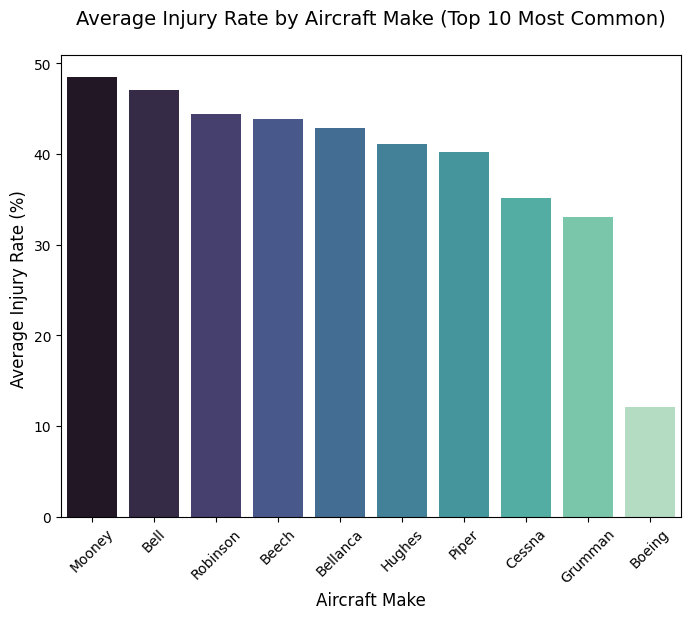

In [172]:
# Calculate the average Injury Rate for top 10 makes
make_injury_rate = (
    key_features[key_features['Make'].isin(key_features['Make'].value_counts().head(10).index)]
    .groupby('Make')['Injury.Rate(%)']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=make_injury_rate.index, y=make_injury_rate.values,
            palette = sns.color_palette("mako", n_colors=len(make_injury_rate))
            , hue=make_injury_rate.index)

plt.title("Average Injury Rate by Aircraft Make (Top 10 Most Common)\n", fontsize=14)
plt.xlabel("Aircraft Make", fontsize=12)
plt.ylabel("Average Injury Rate (%) ", fontsize=12)
plt.xticks(rotation=45)
plt.show();

> **Insight** -Aircraft make Boeing has consistently lower injury rates, indicating better safety performance and less prone to accidents.

#### **2. Average Injury Rate by Aircraft Model**

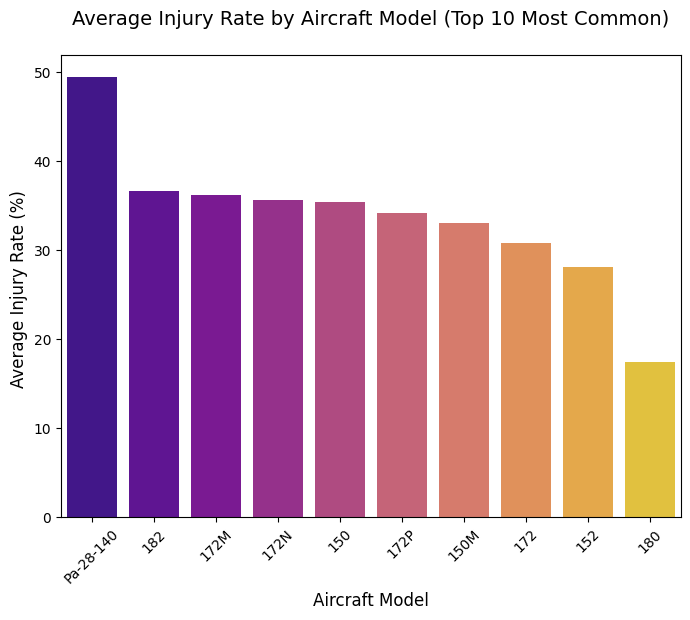

In [174]:
# Calculate the average Injury Rate for only these top 10 models
model_injury_rate = (
    key_features[key_features['Model'].isin(key_features['Model'].value_counts().head(10).index)]
    .groupby('Model')['Injury.Rate(%)']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_injury_rate.index, y=model_injury_rate.values,
            palette = sns.color_palette("plasma", n_colors=len(model_injury_rate))
            , hue=model_injury_rate.index)

plt.title("Average Injury Rate by Aircraft Model (Top 10 Most Common)\n", fontsize=14)
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Average Injury Rate (%) ", fontsize=12)
plt.xticks(rotation=45)
plt.show()


> **Insight** -Aircraft model 180 and 152 have consistently lower injury rates, indicating better safety performance.

#### **3. Average Injury Rate by Engine Type**

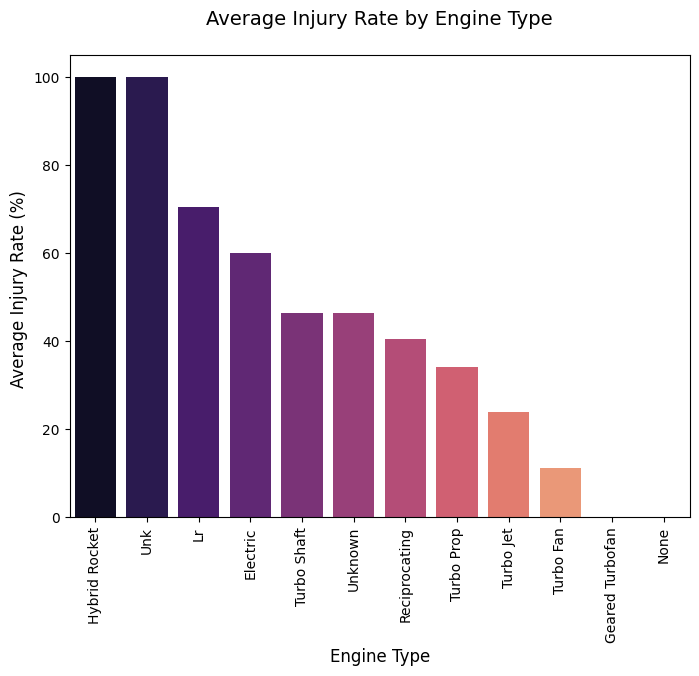

In [175]:
# Calculate the average Injury Rate for each engine type
engine_injury_rate = (
    key_features.groupby('Engine.Type')['Injury.Rate(%)']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=engine_injury_rate.index, y=engine_injury_rate.values,
            palette = sns.color_palette("magma", n_colors=len(engine_injury_rate))
            , hue=engine_injury_rate.index)

plt.title("Average Injury Rate by Engine Type\n", fontsize=14)
plt.xlabel("Engine Type", fontsize=12)
plt.ylabel("Average Injury Rate (%) ", fontsize=12)
plt.xticks(rotation=90)
plt.show()


> **Insight** -Most powerful engines have the highest injury rate. best to consider is Turbo Fan or Turbo Jet

#### **4. Average Injury Rate by Aircraft Damage Category**

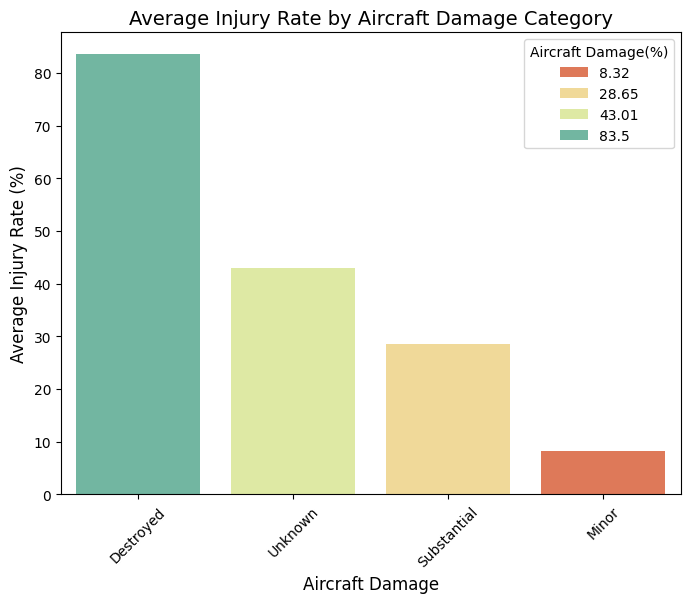

In [176]:
# Calculate the average Injury Rate for each Aircraft Damage category
damage_injury_rate = (
    key_features.groupby("Aircraft.damage")["Injury.Rate(%)"]
    .mean().round(2)
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=damage_injury_rate.index,
    y=damage_injury_rate.values,
   palette = sns.color_palette("Spectral", n_colors=len(damage_injury_rate)),
     hue=damage_injury_rate)

plt.legend(title="Aircraft Damage(%)")
plt.title("Average Injury Rate by Aircraft Damage Category", fontsize=14)
plt.xlabel("Aircraft Damage", fontsize=12)
plt.ylabel("Average Injury Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show();

> **Insight** -The more severe the damage e.g., Destroyed, the higher the likelihood of severe injuries.

#### **5. Average Injury Rate by Number of Engines**

<ipython-input-179-3518298609e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


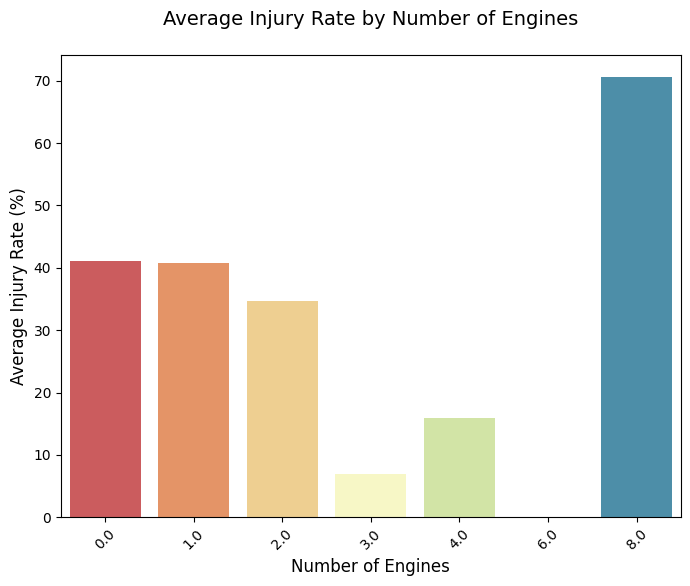

In [179]:
# Calculate the average Injury Rate for each Number of Engines category
num_engines_injury_rate = (
    key_features.groupby("Number.of.Engines")["Injury.Rate(%)"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Plot (Vertical Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=num_engines_injury_rate.index,  # Number of Engines on the x-axis
    y=num_engines_injury_rate.values,  # Injury Rate on the y-axis
    palette=sns.color_palette("Spectral", n_colors=len(num_engines_injury_rate))  # Gradient color palette
)

# Add title and labels
plt.title("Average Injury Rate by Number of Engines\n", fontsize=14)
plt.xlabel("Number of Engines", fontsize=12)
plt.ylabel("Average Injury Rate (%)", fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()


> **Insight** -The number of engines doesn't seem to have a relationship with the average injury rate therefore can't consider this factor

## **Business Recommendations**

This analysis leads to **three Business recommendations**:

1. For a safer fleet, it is advisable to prioritize the **Boeing** aircraft, as they appear to be less prone to severe accidents

2. The aircraft models **180** and **152** have shown consistently lower injury rates. Opting for these models could significantly mitigate the risk of injury
3. Aircraft with more powerful engines tend to have higher injury rates. To minimize risk, focus on aircraft powered by **Turbo Fan** or **Turbo Jet engines**, which typically offer a better balance of performance and safety

-

## **Conclusion**
> Based on the analysis, selecting aircraft from manufacturers like **Boeing**, focusing on models such as the **180** and **152,** and choosing aircraft with **Turbo Fan** or **Turbo Jet engines**, will likely reduce the overall risk of accidents and injuries.